![title](tintin.png)

# **EMOTION AUDIO RECOGNITION**

# Importation des librairies

In [56]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Chargement des données

In [24]:

path = 'Speech_Emotion_Data\data\AudioWAV'
audio_path = []
audio_emotion = []

# collects all the audio filename in the variable 'path'
directory_path = os.listdir(path)

for audio in directory_path:
    audio_path.append(os.path.join(path, audio))
    emotion = audio.split('_')
    if emotion[2] == 'SAD':
        audio_emotion.append("sad")
    elif emotion[2] == 'ANG':
        audio_emotion.append("angry")
    elif emotion[2] == 'DIS':
        audio_emotion.append("disgust")
    elif emotion[2] == 'NEU':
        audio_emotion.append("neutral")
    elif emotion[2] == 'HAP':
        audio_emotion.append("happy")
    elif emotion[2] == 'FEA':
        audio_emotion.append("fear")
    else:
        audio_emotion.append("unknown")

emotion_dataset = pd.DataFrame(audio_emotion, columns=['Emotions'])
audio_path_dataset = pd.DataFrame(audio_path, columns=['Path'])
dataset = pd.concat([audio_path_dataset, emotion_dataset], axis= 1)
#print(len(dataset))
print(dataset.head())
# print(dataset['File Path'][55])

                                                Path Emotions
0  Speech_Emotion_Data\data\AudioWAV\1001_DFA_ANG...    angry
1  Speech_Emotion_Data\data\AudioWAV\1001_DFA_DIS...  disgust
2  Speech_Emotion_Data\data\AudioWAV\1001_DFA_FEA...     fear
3  Speech_Emotion_Data\data\AudioWAV\1001_DFA_HAP...    happy
4  Speech_Emotion_Data\data\AudioWAV\1001_DFA_NEU...  neutral


<AxesSubplot:title={'center':'Emotion Count'}, xlabel='Emotions', ylabel='Count'>

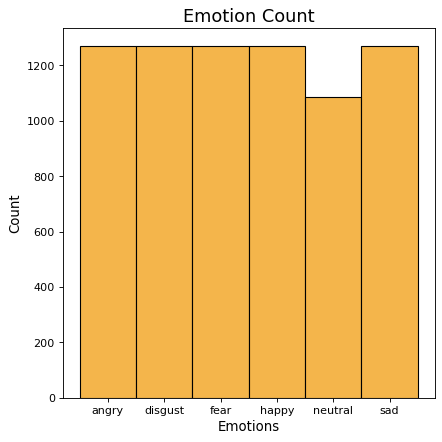

In [25]:

# Visualization
# counting audio categorized by emotions
plt.figure(figsize=(6,6), dpi=80)
plt.title("Emotion Count", size=16)
plt.xlabel('Emotions', size = 12)
plt.ylabel('Count', size = 12)
sns.histplot(dataset.Emotions, color='#F19C0E')
#plt.show()


In [26]:
# showing spectrogram and waveplot
emotion_sad = dataset[dataset['Emotions']=='sad']['Path']
print(type(emotion_sad))
#choosing a file to plot wave and spectogram
#print(emotion_sad.values[65])
data_path = emotion_sad.values[542]
data, sampling_rate = librosa.load(data_path)


<class 'pandas.core.series.Series'>


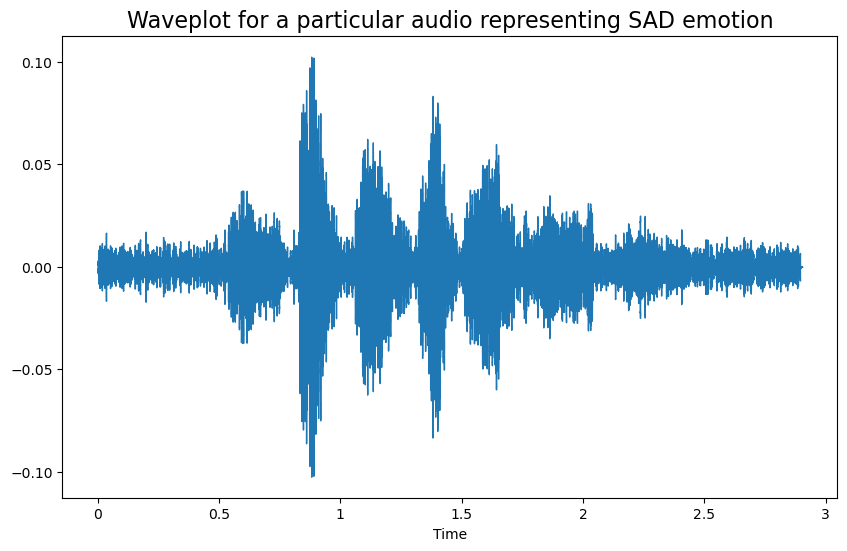

In [59]:
#waveplot
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing SAD emotion", size=16)
librosa.display.waveshow(data, sr=sampling_rate)
#plt.show()

In [60]:
Audio(data_path)

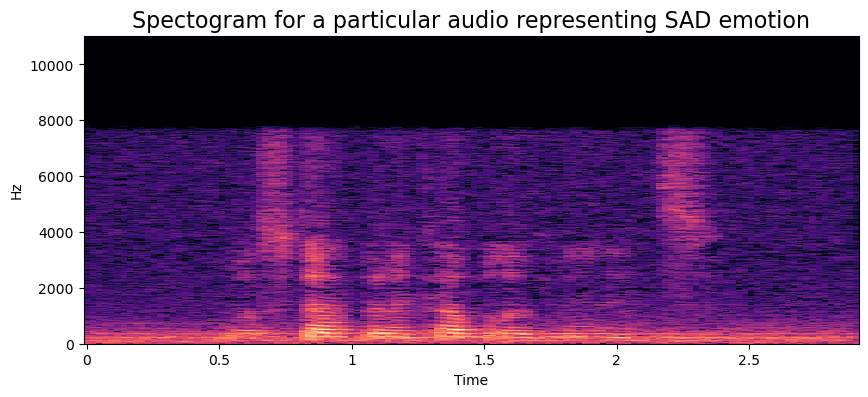

In [31]:
#spectogram
plt.figure(figsize=(10,4))
plt.title("Spectogram for a particular audio representing SAD emotion", size=16)
D = librosa.stft(data)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
librosa.display.specshow(S_db, sr = sampling_rate, x_axis='time', y_axis='hz')
#plt.show()


In [32]:
# for audio processing accuracy
# add noise to audio and check how the waveplot changes
# also the observing the change in audio quality

## Augmentation (Noise Injection)
noise_amp = 0.035*np.random.uniform()*np.amax(data)
audio_injected_data = data + noise_amp*np.random.normal(size=data.shape[0])


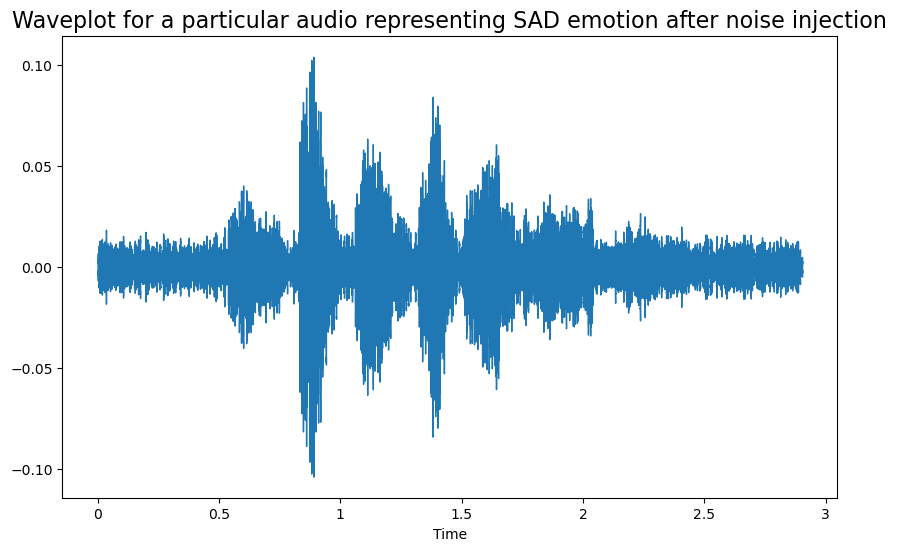

In [34]:
# waveplot view after noise injection:
plt.figure(figsize=(10,6))
plt.title("Waveplot for a particular audio representing SAD emotion after noise injection", size=16)
librosa.display.waveshow(audio_injected_data, sr=sampling_rate)
plt.show()

In [35]:
dataset = dataset.head(50)
# Feature extraction

X, Y = [], []
print("Feature processing...")

for path, emo, index in zip(dataset.Path, dataset.Emotions, range(len(dataset))):
    value, sample = librosa.load(path)
    # noise injection
    noise_amp = 0.035 * np.random.uniform() * np.amax(value)
    value = value + noise_amp * np.random.normal(size=value.shape[0])
    # mfcc
    mfcc = librosa.feature.mfcc(y=value, sr= sample, n_mfcc=13, n_fft=200, hop_length=512)
    mfcc = np.ravel(mfcc.T)
    # mel
    mel = librosa.feature.melspectrogram(y=value, sr=sample, hop_length = 256, n_fft = 512, n_mels=64)
    mel = librosa.power_to_db(mel ** 2)
    mel = np.ravel(mel).T
    result = np.array([])
    result = np.hstack((result, mfcc, mel))
    print(result)
    result = np.array(result)
    X.append(result)
    Y.append(emo)


Feature processing...
[-568.37737224  -84.8530886   -12.46109579 ...  -56.34512145  -56.34512145
  -56.34512145]
[-650.82560033  -72.23658303  -16.64975831 ...  -73.9022461   -73.27167675
  -73.9022461 ]
[-576.18497573  -49.90668892   -2.83043194 ...  -50.24021085  -50.24021085
  -50.24021085]
[-566.89966936  -65.37651904   -1.36807054 ...  -57.42452638  -57.42452638
  -57.42452638]
[-640.35925669  -45.08780239   22.32718987 ...  -59.65208818  -59.65208818
  -59.65208818]
[-676.89320325  -71.03937878  -23.73305921 ...  -80.67127851  -80.67127851
  -77.74381045]
[-507.9834782   -80.11067376  -36.27274922 ...  -49.48411436  -49.48411436
  -48.26843818]
[-710.07773571  -20.17129408   -8.96209818 ...  -69.53089006  -69.53089006
  -69.53089006]
[-639.2119687   -69.79273256  -26.77135007 ...  -72.41896044  -75.52363117
  -75.93548354]
[-583.01082483  -72.97243935  -20.97037477 ...  -58.78644919  -58.78644919
  -58.78644919]
[-770.82630386  -56.65892279    1.28370906 ...  -99.21176625  -98.42

In [36]:
print(X)

[array([-568.37737224,  -84.8530886 ,  -12.46109579, ...,  -56.34512145,
        -56.34512145,  -56.34512145]), array([-650.82560033,  -72.23658303,  -16.64975831, ...,  -73.9022461 ,
        -73.27167675,  -73.9022461 ]), array([-576.18497573,  -49.90668892,   -2.83043194, ...,  -50.24021085,
        -50.24021085,  -50.24021085]), array([-566.89966936,  -65.37651904,   -1.36807054, ...,  -57.42452638,
        -57.42452638,  -57.42452638]), array([-640.35925669,  -45.08780239,   22.32718987, ...,  -59.65208818,
        -59.65208818,  -59.65208818]), array([-676.89320325,  -71.03937878,  -23.73305921, ...,  -80.67127851,
        -80.67127851,  -77.74381045]), array([-507.9834782 ,  -80.11067376,  -36.27274922, ...,  -49.48411436,
        -49.48411436,  -48.26843818]), array([-710.07773571,  -20.17129408,   -8.96209818, ...,  -69.53089006,
        -69.53089006,  -69.53089006]), array([-639.2119687 ,  -69.79273256,  -26.77135007, ...,  -72.41896044,
        -75.52363117,  -75.93548354]), 

In [37]:
print(Y)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'angry', 'angry', 'angry', 'disgust', 'disgust', 'disgust', 'fear', 'fear', 'fear', 'happy', 'happy', 'happy', 'neutral', 'sad', 'sad', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'angry', 'disgust', 'fear', 'happy']


In [38]:
extracted_audio_df = pd.DataFrame(X)
extracted_audio_df["emotion_of_audio"] = Y
print(extracted_audio_df.shape)
print(extracted_audio_df.tail(10))
extracted_audio_df = extracted_audio_df.fillna(0)
#print(extracted_audio_df.isna().any())

(50, 19318)
             0          1          2          3          4          5  \
40 -683.318681 -11.365287  25.625679   6.762344   2.913119  12.531934   
41 -589.512116 -76.523138 -26.535545  20.616219  13.693725  -5.496401   
42 -483.738699 -76.892417 -26.217886  30.851092   3.404115  -8.328994   
43 -602.160286 -48.884328  -2.766095  26.616887  15.157425 -16.868327   
44 -600.497822 -72.879901  -6.172860  11.564903  19.748541  -0.615325   
45 -705.287391 -78.326989  -4.621419  29.102459  28.990257 -11.791246   
46 -776.191873 -22.178709  -8.344360  13.554070  14.660389 -11.000373   
47 -684.004350 -40.192184 -14.171046  16.622410  13.210550  -7.970475   
48 -725.875178   8.770497  26.726210  10.319495  11.578507   6.449257   
49 -655.169172  -7.870105   2.143786   2.768258  10.238058  -8.540486   

            6         7          8          9  ...      19308      19309  \
40  -9.256212 -4.584737  -4.487690  -4.241098  ... -55.420571 -55.420571   
41 -16.114482  2.133628  -7.1551

In [39]:
# preparing to train
X = extracted_audio_df.drop(labels='emotion_of_audio', axis= 1)
Y = extracted_audio_df['emotion_of_audio']


In [49]:
X.shape

(50, 19317)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(np.array(X), Y, test_size=0.2)

In [41]:

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
